# Lab 5

## Before Lab
- Read the Scikit-Learn library documentation that covers Bayes nets: https://scikit-learn.org/
stable/modules/naive_bayes.html#
- The algorithm that we cover in the lectures is implemented as ”Multinomial Naive Bayes” in the
Scikit-Learn. At the very least, you should try to run it this week as part of your Portfolio building.
Allowing for some adaptation to your own code, this will amount to running a bit of code like this:

> ```python
> from sklearn.naive_bayes import MultinomialNB
> model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
> model.fit(X, Y)
> ```
- Repeat the evaluation steps from the last lab, replacing the classifier you used with the Bayes net. Check:
does it have better performance in any of the evaluation metrics?
- (optional for BSc, Mandatory for MSc) Study other Bayes net algorithms given in Scikit-Learn:
    * Gaussian Naive Bayes
    * Complement Naive Bayes
    * Bernoulli Naive Bayes
    * Categorical Naive Bayes
Again, use the standard evaluation metrics to see whether any of these algorithms bring improvement to
either overall accuracy or one of the evaluation metrics.
- (hard, optional) There are several implementations of complex Bayes Nets (i.e. Bayes nets with complex
hierarchical structure) available on-line.
Investigate whether any of these libraries can work with your data sets, and whether this brings any
improvement. Note: complex Bayes nets can show non-trivial dependencies among features. So, they may
have better explanatory power. 

## During Lab
- Share your proposed solutions, discuss which Bayes net implementations and which evaluation metrics
worked best. If some worked better, can you hypothesise why?
- Within the Portfolio text, fill in the table
- In the table, highlight with bold the best performing algorithms in each category.
- Make conclusions. You will get more marks for more interesting and “out of the box” questions and
answers.

## After
- Group rep: Make sure all group members have tasks for the week
- Everyone: Incorporate the discussion during the lab into your Python code
- Everyone: Incorporate all code used in the lab into your Portfolio repository.

# Imports 

In [52]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [53]:
np.random.seed(0)

In [54]:
df3 = pd.read_csv("Data/data3.csv")
df4 = pd.read_csv("Data/data4.csv")

# Statistical Summary and Correlation

In [55]:
df3.describe()

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.264368,0.914751,1.970307,2.603448,2.387931,1.494253,16.726054,0.237548,0.260536,0.272989,0.792146,11.341954
std,0.656142,0.279386,0.834353,1.124907,1.099938,0.911714,1.239975,0.425785,0.439138,0.445708,0.405967,3.864796
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,10.000000
50%,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,11.000000
75%,0.000000,1.000000,2.000000,4.000000,3.000000,2.000000,18.000000,0.000000,1.000000,1.000000,1.000000,14.000000
max,3.000000,1.000000,4.000000,4.000000,4.000000,5.000000,22.000000,1.000000,1.000000,1.000000,1.000000,20.000000


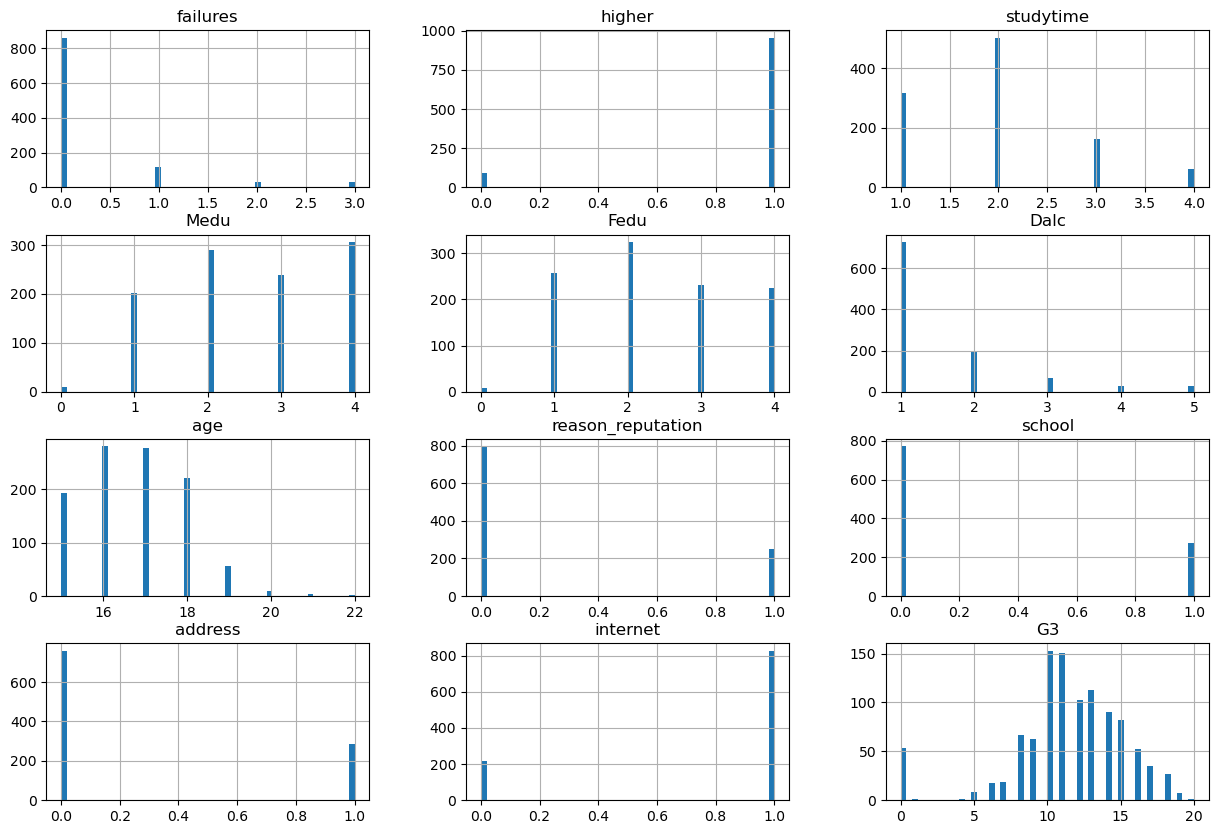

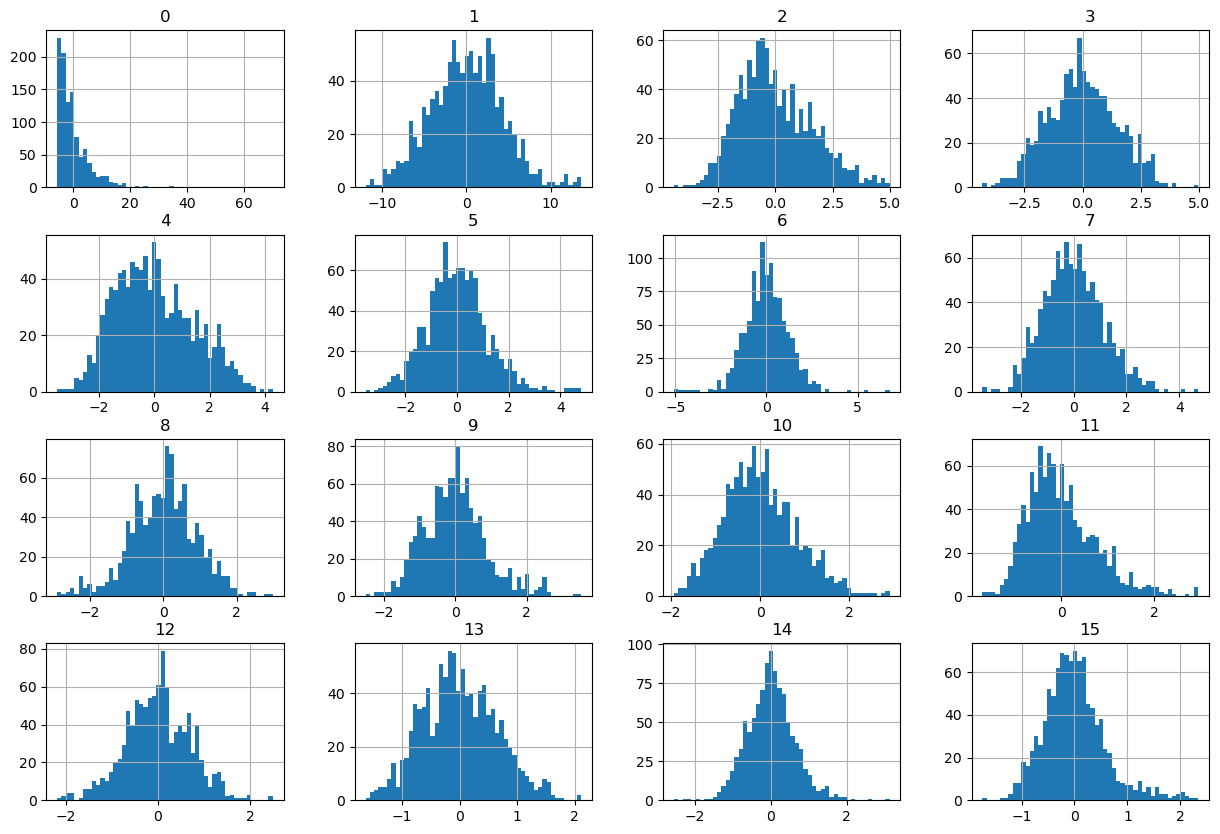

In [56]:
df3.hist(bins=50, figsize=(15,10))
plt.show()
df4.hist(bins=50, figsize=(15,10))
plt.show()

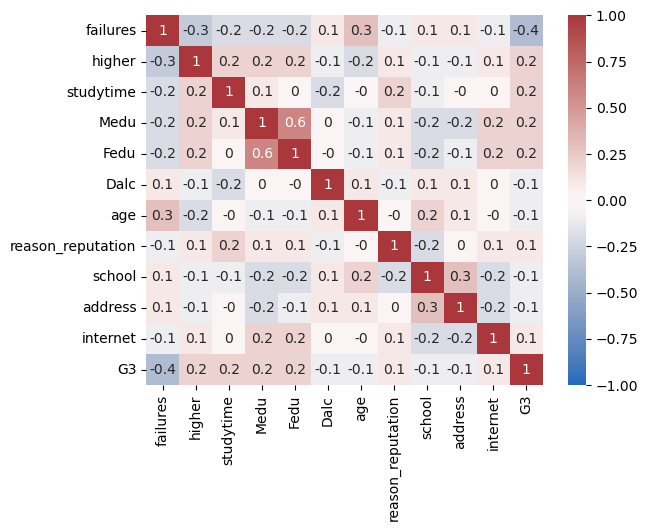

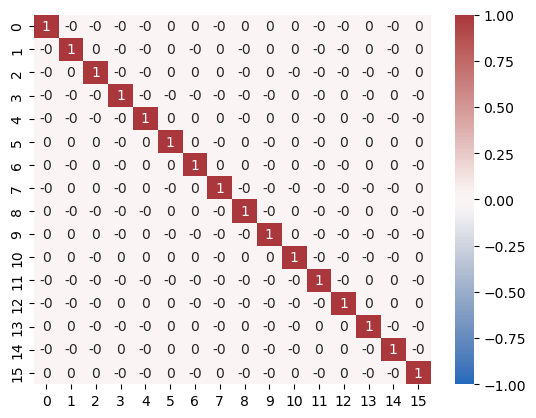

In [57]:
corr_matrix = df3.corr().round(1)

# Resizing the heatmap
# fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

corr_matrix = df4.corr().round(1)

# Resizing the heatmap
# fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

# Modelling and Testing

In [58]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB

In [59]:
features = df3.iloc[:,:-1].to_numpy()
target = df3.iloc[:,-1].to_numpy()
target = target > target.mean()
target.mean()

0.4885057471264368

In [60]:
def showCM(cm):
    ax = sns.heatmap(cm, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [61]:
def showMetrics(x_test, y_test, model):
    predicted = model.predict(x_test)

    #I obtain the confusion matrix
    cm = confusion_matrix(y_test, predicted)

    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    TN = cm[0,0]

    # accuracy, TP rate, FP rate, precision, recall, F measure, the ROC

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    # print("Overall accuracy: ", ACC)

    # TP rate
    TPR = TP/(TP+FN)
    # print("recall: ", TPR)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # print("Fall out or false positive rate", FPR)

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # print("Precision", PPV)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # print("Recall: ", TPR)

    # F-measure
    FM = (2*TPR*PPV)/(TPR+PPV)
    # print("F-measure: ", TPR)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # print("True negative rate", TNR)

    # Negative predictive value
    NPV = TN/(TN+FN)
    # print("Negative predictive value", NPV)

    # False negative rate
    FNR = FN/(TP+FN)
    # print("False negative rate", FNR)

    # False discovery rate
    FDR = FP/(TP+FP)
    # print("False discovery rate", FDR)

    # ROC curve (true positive / false positive)
    # plot_roc_curve(model, x_test, y_test)
    # showCM(cm)

    AUC = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

    return [ACC, TP, FP, TN, FN, TPR, TNR, PPV, AUC]



In [62]:
algo_list = []

In [63]:
model = MultinomialNB(alpha=0.001)
kf = KFold(10)

evaluation = []

for train_index, test_index in kf.split(features,target):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(x_train, y_train)
    evaluation.append(showMetrics(x_test, y_test, model))

tmp = np.array(evaluation).mean(0)
algo_list.append(["MultinomialNB"] + tmp.tolist())

In [64]:
model = GaussianNB()
kf = KFold(10)

evaluation = []

for train_index, test_index in kf.split(features,target):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(x_train, y_train)
    evaluation.append(showMetrics(x_test, y_test, model))

tmp = np.array(evaluation).mean(0)
algo_list.append(["GaussianNB"] + tmp.tolist())

In [65]:
model = ComplementNB()
kf = KFold(10)

evaluation = []

for train_index, test_index in kf.split(features,target):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(x_train, y_train)
    evaluation.append(showMetrics(x_test, y_test, model))

tmp = np.array(evaluation).mean(0)
algo_list.append(["ComplementNB"] + tmp.tolist())

In [66]:
model = BernoulliNB()
kf = KFold(10)

evaluation = []

for train_index, test_index in kf.split(features,target):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(x_train, y_train)
    evaluation.append(showMetrics(x_test, y_test, model))

tmp = np.array(evaluation).mean(0)
algo_list.append(["BernoulliNB"] + tmp.tolist())

In [67]:
model = CategoricalNB()
kf = KFold(10)

evaluation = []

for train_index, test_index in kf.split(features,target):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(x_train, y_train)
    evaluation.append(showMetrics(x_test, y_test, model))

tmp = np.array(evaluation).mean(0)
algo_list.append(["CategoricalNB"] + tmp.tolist())

In [68]:
features = ((df4-df4.min())/(df4.max()-df4.min())).to_numpy()

model = MultinomialNB()
kf = KFold(10)

evaluation = []

for train_index, test_index in kf.split(features,target):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model.fit(x_train, y_train)
    evaluation.append(showMetrics(x_test, y_test, model))

tmp = np.array(evaluation).mean(0)
algo_list.append(["MultinomialNB PCA"] + tmp.tolist())

In [69]:
algo_list = np.array(algo_list)
algo_list = pd.DataFrame(algo_list[:,1:], index=algo_list[:,0], columns=["Accuracy", "TP", "FP", "TN", "FN", "Sensitivity", "Specificity", "Precision", "Area Under Curve"])
algo_list

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Area Under Curve
MultinomialNB,0.6602380952380953,40.1,24.6,28.8,10.9,0.7571408173217049,0.518770332901983,0.6435185488155488,0.7364316126194462
GaussianNB,0.6737179487179488,44.1,27.2,26.2,6.9,0.8462822978355075,0.47613988095412924,0.6210936636008875,0.74330812548191
ComplementNB,0.6564010989010989,40.4,25.3,28.1,10.6,0.7588056807117394,0.5009489494184605,0.6353567493914818,0.7364197392142474
BernoulliNB,0.6640293040293039,40.4,24.5,28.9,10.6,0.7519979134037535,0.5233991520956252,0.6440025951169488,0.6983958134959142
CategoricalNB,0.665952380952381,36.8,20.7,32.7,14.2,0.6968624534651203,0.602494413789579,0.6642082227919905,0.7419722786628847
MultinomialNB PCA,0.7437362637362639,26.3,2.0,51.4,24.7,0.5800420932475181,0.9685235317563891,0.9478995232766092,0.95059922867975
